# Superficies Fractais

A idéia é plotar explorações de calculos considerando o dominio dos numeros complexos (ou um trecho dele) como imagens.

O conceito é similar ao que origina o conjunto de Manldelbrot, mas meu interesse é explorar calculos mais diretos (em vez dos iterativos que geram o conjunto de Mandelbrot).

A idéia é ver se é possivel gerar padrões que sejam funções diretas do espaço em si (do plano complexo) e talvez conseguir manipular os calculos para gerar qualquer padrao que se queira.

Como exemplo, em vez de pensar em numeros complexos, utilizando o plano x,y como exemplo, se uma funcao fosse definida como f(x,y) = x % 2 + y % 2 > 0 teriamos um quadriculado de 1 pixel se mapeassemos 1px por numero inteiro em x e y e mapeassemos true = branco e false = preto.

Pode-se manipular essa funcao para gerar um quadriculado de qualquer tamanho e até mesmo retangulos em vez de quadrados:

f(x,y) = ((x % w) / w ) % 2 == 1 or ((y % h) / h ) % 2 == 1

Entao a ideia é explorar o plano complexo de forma similar para ver se é possivel gerar padroes mais sofisticados do que um quadriculado.

O exemplo mais simples seria replicar a ideia do par/impar com o plano complexo:

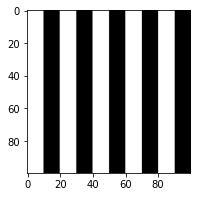

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def gen_field( size ):
    x = np.linspace( 0+0j, complex( size - 1, 0), size )
    y = np.linspace( 0+0j, complex( 0, size - 1), size )

    x, y = np.meshgrid( x, y )
    field = x + y
    return field

field = gen_field( 100 )

def mod_( cpx, val ):
    return int(( cpx.real / val )) % 2

vec_mod_ = np.vectorize( mod_ )

img = vec_mod_( field, 10 )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )


É facil gerar padrões dessa forma repetitiva, como barras de gradientes:

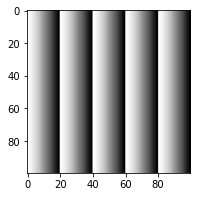

In [2]:
def mod_( cpx, val ):
    return ( cpx.real / val ) % 2

vec_mod_ = np.vectorize( mod_ )

field = gen_field( 100 )

img = vec_mod_( field, 10 )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )


Mas o objetivo é conseguir coisas como (que consegui por acidente e prova q o conceito é pelo menos concebivel, e fractal):

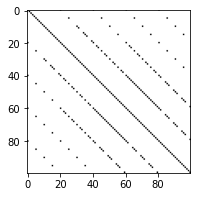

In [3]:
def mod_( cpx, val ):
    return 0 if ( cpx.real / val ) % 2 != ( cpx.imag / val ) % 2 else 1.

vec_mod_ = np.vectorize( mod_ )

field = gen_field( 100 )

img = vec_mod_( field, 10 )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )

## Resultados acidentais

### Degrade exponencial

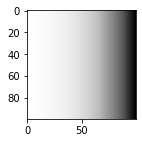

In [4]:
import math

field = gen_field( 100 )

def cossin( cpx, strength ):
    return math.exp( cpx.real / strength ) 

vec_cossin = np.vectorize( cossin )

img = vec_cossin( field, 40. )
plt.figure( figsize=( 2, 2 ))
imgplot = plt.imshow( img,cmap="Greys" )

### Sofá

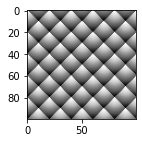

In [5]:
from math import floor

field = gen_field( 100 )

def mag_modj( a, b ):
    x = a/b
    x = floor( x.real ) + ( floor( x.imag )*1j )
    z = x*b
    return np.abs( a-z )

vec_mag_modj = np.vectorize( mag_modj )

img = vec_mag_modj( field, 10+10j )
plt.figure( figsize=( 2, 2 ))
imgplot = plt.imshow( img,cmap="Greys" )

### Degradê conico

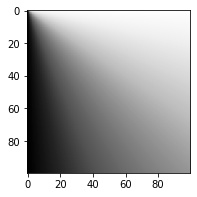

In [6]:
from math import floor

field = gen_field( 100 )

def cone( cpx, ang ):
    return math.atan2( cpx.imag / 100., cpx.real / 100 )

vec_cone = np.vectorize( cone )

img = vec_cone( field, 30 )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )

### Degrade circular

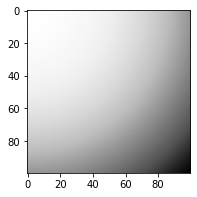

In [7]:
from math import floor

field = gen_field( 100 )

def brot( cpx ):
    return np.abs( cpx*cpx + cpx )

vec_brot = np.vectorize( brot )

img = vec_brot( field )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )

### Azulejo? Toalha?

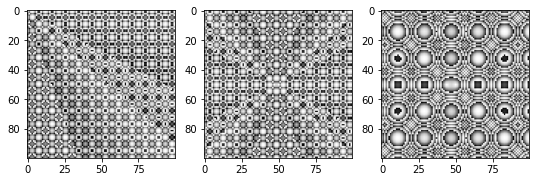

In [8]:
from math import floor

field = gen_field( 100 )

def brot( cpx, dif, div ):
    v = ( cpx - dif ) / div 
    res = np.abs( v * v + v )
    return res.real % 1 #( res.real % 1, res.imag % 1, 0 )

vec_brot = np.vectorize( brot )

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,9))
img = np.array( vec_brot( field, 0, 3. )) #.reshape( 100, 100, 3 )

imgplot = ax1.imshow( img, cmap="Greys" )

img = np.array( vec_brot( field, 50+50j, 3. )) #.reshape( 100, 100, 3 )
imgplot = ax2.imshow( img, cmap="Greys" )

img = np.array( vec_brot( field, 50+50j, 6. )) #.reshape( 100, 100, 3 )
imgplot = plt.imshow( img, cmap="Greys" )

### Toalha colorida

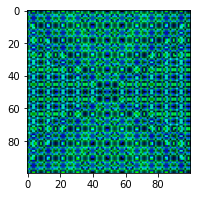

In [3]:
from math import floor

size = 100
field = gen_field( size )

img = np.zeros(( size, size, 3 ))

def brot( cpx, dif, div ):
    v = ( cpx - dif ) / div 
    res = v * v + v
    return complex( res.real % 1, np.abs( res ) % 1 )

vec_brot = np.vectorize( brot )

res = np.array( vec_brot( field, 50+50j, 3 )) #math.pi ** 2 )) #.reshape( 100, 100, 3 )
img[:,:,2] = res.real
img[:,:,1] = res.imag


plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img ) #, cmap="Greys" )

Tentativas correntes:

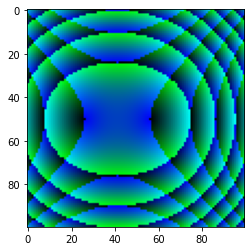

In [8]:
from math import floor
import cmath
import math

size = 100
field = gen_field( size )

img = np.zeros(( size, size, 3 ))

def prob( cpx, dif, div ):
    
    v = ( cpx - dif ) / div 
    

vec_brot = np.vectorize( brot )

res = np.array( vec_brot( field, 56+50j, 30. )) 
img[:,:,2] = res.real
img[:,:,1] = res.imag


plt.figure( figsize=( 4, 4 ))
imgplot = plt.imshow( img ) #, cmap="Greys" )

Algoritmo probabilistico (probabilidade de ponto ser aceso de acordo com os pontos ao redor) mais conexão rapida de pontos mais próximos:

314


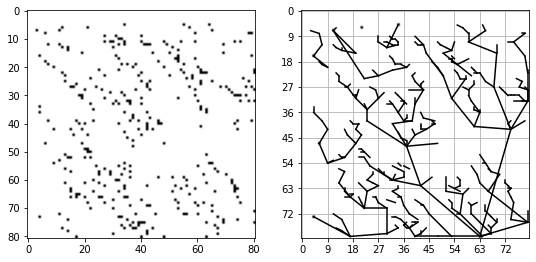

In [7]:
import random

size = 81
x = np.linspace( 0+0j, complex( size - 1, 0), size )
y = np.linspace( 0+0j, complex( 0, size - 1), size )

x, y = np.meshgrid( x, y )
grid = x + y

def prob( arr, res, size ):
        rnd = random.random
        r = float( int( rnd() * size ))
        i = float( int( rnd() * size ))
        rcpx = complex( r, i )

        found = rcpx in arr
        found = found or r in arr.real and rnd() < 0.5
        #found = found or int( r / 2 ) in arr.real
        #found = found or i in arr.imag or i in arr.real
        #found = found or int( i / 2 ) in arr.imag

        found = found or ( 1 in res and rnd() < 0.1 )

        return 1 if found else 0
            
img = np.zeros(( size, size ))

random.seed( 3 )
pts = []


def pow2( x ):
    return x *x 

for i in range( size ):
    for j in range( size ):
        arr = grid[i-3:i,j-3:j]
        shape = arr.shape
        if shape[ 0 ] == 0 or shape[ 1 ] == 0: continue
        img[ i, j ] = prob( arr, img[i-3:i,j-3:j], size )

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(9,9))
imgplot = ax1.imshow( img, cmap="Greys" )

pts = []

img = img.copy()

s = 0
while 1 in img and np.count_nonzero( img == 1 ) > 1 and s < int( size / 2 ) - 1:
    s += 1
    #print( s, np.count_nonzero( img == 1 ))
    #print( len( pts ))
    for i in range( size ):
        for j in range( size ):
            arr = img[i-s:i+s+1,j-s:j+s+1].copy()
            if not 1 in arr: continue
            if arr[s,s]==0: continue
            shape = arr.shape
            if shape[ 0 ] == 0 or shape[ 1 ] == 0: continue
            arr[s,s] = 0
            
            nxt = np.where( arr == 1 )
            if not 1 in arr: continue
            seg = [( i, j )]
            img[ i, j ] = 0
            
            try:
                if nxt[ 0 ].shape[ 0 ] == 1:
                    seg.append(( np.sum( nxt[ 0 ]) - s + i, np.sum( nxt[ 1 ]) - s + j ))
                else:
                    seg.append(( np.sum( nxt[ 0 ][ 0 ]) - s + i, np.sum( nxt[ 0 ][ 1 ]) - s + j ))

                pts.append( seg )
            except:
                pass
    
imgplot = ax2.imshow( img, cmap="Greys" )

print( len( pts ))
ax2.set_xticks( np.arange(0, size, size / 9 ))
ax2.set_yticks( np.arange(0, size, size / 9 ))
ax2.grid()
for pt in pts:
    seg = np.array( pt )
    img2 = ax2.plot( seg[:,1], seg[:,0], color='black')

plt.show()


## Rapid Exploring Random Tree

In [ ]:
import numpy as np
import random

size = 100
delta = size / 10.


def RandomSample( goal ):
    rnd_vx = complex( int( random.random() * size ), int( random.random() * size ))
    
    if np.abs( goal - rnd_vx ) < 1:
        return goal
    else:
        return rnd_vx
    
    
def GetClosestNode( pts, node ):
    d = 9999999
    cursor = -1
    for i in range( len( pts )):
        nd = np.abs( pt - node )
        if nd < d:
            d = nd
            cursor = i
            
    return pts[ i ]


def Extend( pts, closest, rndnode, delta ):
        x1, y1 = float( closest.real ), float( closest.imag )
        x2, y2 = float( rndnode.real ), float( rndnode.imag )
        
        dx, dy = x2 - x1, y2 - y1
        vec = complex( dx, dy )
        mag = np.abs( vec )
        
        if mag < delta:
            return rndnode
        else:
            return complex( int( dx / ( mag / delta ) + x1 ), 
                              int( dy / ( mag / delta ) + y1 ))
        


# Returns a random tree containing the start and the goal.
# Grows the tree for a maximum number of iterations.
def Rexrant( start, goal, maxIters, seed, delta ):
    # Initialize a tree with a root as the start node.
    root = { "vx": start, vxs: []}
    pts = [ root ]

    reachedGoal = False
    iter = 0

    # Keep growing the tree until it contains the goal or we've
    # grown for the required number of iterations.
    while reachedGoal == False and iter < maxIters:
        
         # Get a random node somewhere near the goal
         rndnode = RandomSample( goal );
        
         # Get the closest node in the tree to the sample.
         closest = GetClosestNode( pts, rndnode );
        
         # Create a new node between the closest node and the sample.
         extension = Extend( pts, closest, rndnode, delta )
        
         # If we haven't yet reached the goal, and the new node
         # is very near the goal, add the goal to the tree.
         if reachedGoal == False and extension.IsNear( goal ):
            extension.AddChild( goal )
            reachedGoal = True
            
         iter += 1
        
    return root

start = complex( size / 2, size / 2 )
goal = complex( 1, size / 2 )

tree = Rexrant( start, goal, 1, 1001, delta )
